# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

If you don't mind I'll tex in English not to swich language each time.
Let's look at the 2nd criteria of convexity and strong convexity: \\
Convexity: $∇^2f(x) \succeq 0$

Strong Convexity: $∇^2f(x) \succeq  μI, \space μ > 0$

Gradient: $∇f(x) = \frac12(A + A^T)x - b$ \\
Hessian: $∇^2f(x) = \frac12(A + A^T)$

Not always convex or strong convex, ex. $A = -I ⇒ A + A^T = -2I ≺ 0$

Now let's see the conditions when the problem is considered to be convex:

So, if $\frac12 (A + A^T) \succeq 0$ then the problem is convex (so the eigenvalues of $\frac12 (A + A^T)$ are non-negative)

If $\frac12 (A + A^T) \succeq μI$ then the problem is strong convex (so the eigenvalues of $\frac12 (A + A^T) - μI$ are non-negative)




__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

The strong convexity constant is calculated like this:

$\frac12 (A + A^T) - μI \succeq 0$, which means that eigenvalues are non-negative: $λ(\frac12 (A + A^T) - μI) \geq 0 ⇒ \frac12λ_i(A + A^T) \geq μ \space ∀i \Rightarrow \boxed{\frac12 \min λ(A + A^T) \geq μ}$

Gradient Lipschitz constant:
$∀x, x_0 \space \|∇f(x) - ∇f(x_0)\| ≤ L\|x - x_0\|$

$\| \frac12(A + A^T)x - b - \frac12(A + A^T)x_0 + b \| = \frac12\|(A + A^T)(x - x_0) \| ≤ L\|x - x_0\|$

The function is differentiable, so we can say that $L \leq \sup_x \| ∇^2f(x) \| = \frac12 \| A + A^T \|$

$\boxed {L \leq \frac12 \| A + A^T \|}$

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

In [125]:
#ответ
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

In [126]:
d = 10  #int(input())
mu = 1  #float(input())
L = 100 #float(input())

In [127]:
#I will generate a diagonal matrix

def gen_A(d, mu, L):
    D = np.eye(d)*2*mu
    D[0][0] = 1 + np.sqrt(max((D[0][0])**2, (2*L)**2 - (d - 1)*(2*mu)**2))

    A = 1/2 * D
    return A    

In [128]:
def gen_A(d, mu, L): 
    U = ortho_group.rvs(dim = d)
    A = mu * np.eye(d)
    A[0][0] = L
    A = np.linalg.inv(U) @ A @ U

    return A

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [129]:
#ответ
def f(A, b, x):
    return 1/2*(x.T @ A @ x - b.T @ x)

In [130]:
def Grad_Descent(n_iter, A, lr, b, x_0):
    points = []
    x_old = x_0
    for i in range(n_iter):
        grad = Get_grad (A, b, x_old)
        
        x_new = x_old - lr*grad
        x_old = x_new 
        points.append(x_old)
    return points

def Get_grad (A, b, x): 
    return 1/2*np.matmul((A + A.T), x) - b

In [131]:
A = gen_A(d, mu, L)
b = np.ones(d)

Grad_Descent(11, A, 0.1, b, b)

[array([ 0.74371352,  2.89375195,  1.08081529,  0.86428594,  4.30811968,
        -1.20275091, -2.62785456, -0.74887382, -0.53877484,  1.36930526]),
 array([  3.05029185, -14.15001556,   0.35347769,   2.08571246,
        -25.4649574 ,  18.62200726,  30.02283646,  14.99099053,
         13.31019873,  -1.9544421 ]),
 array([ -17.70891314,  139.24389203,    6.89951603,   -8.90712622,
         242.49273629, -159.80081621, -263.83338269, -126.66778859,
        -111.33056342,   27.95928412]),
 array([  169.12393178, -1241.3012763 ,   -52.01482901,    90.02842193,
        -2169.12650692,  1446.004595  ,  2380.87258969,  1148.26122345,
         1010.43629596,  -241.26425181]),
 array([ -1512.37167249,  11183.60523868,    478.21427638,   -800.39151145,
         19535.44668197, -13006.24410594, -21421.48116181, -10326.0998849 ,
         -9085.46543852,   2181.74757153]),
 array([  13621.08876589, -100640.55339615,   -4293.84767216,
           7213.38788902, -175805.71201807,  117063.99420259,
    

__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [132]:
#ответ
#Solution with linalg
x_true = np.linalg.solve(A, b)

In [133]:
n_iter = 10**4
x_0 = np.zeros(d)

points = Grad_Descent(n_iter, A, 1/L, b, x_0)
diff_arr = []
crit_arr = []
crit_2_arr = []
for i in range(n_iter):
    diff_arr.append(points[i] - x_true)
    crit_arr.append(np.linalg.norm(diff_arr[i]))
    crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true)))

Seems that the criteria is quite low, so I dare to say that it converges

__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

In [134]:
def plot_graph(x, y, label, title_, logscale = False):
    plt.plot(x, y, 'c')
    if logscale == True:
        plt.yscale('log')
    plt.xlabel('n_iter')
    plt.ylabel(label)
    plt.title(title_)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


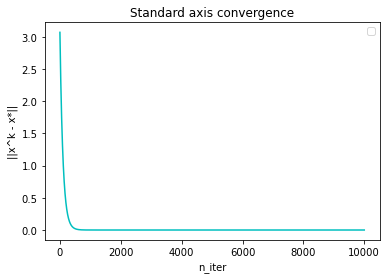

No handles with labels found to put in legend.


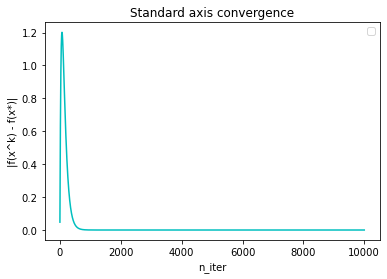

No handles with labels found to put in legend.


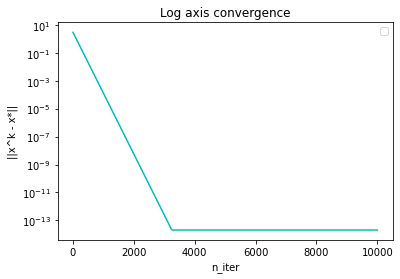

No handles with labels found to put in legend.


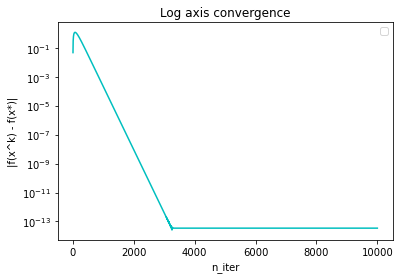

In [135]:
#ответ
x = [i + 1 for i in range(n_iter)]
y1 = crit_arr
y2 = crit_2_arr

plot_graph(x, y1, '||x^k - x*||', 'Standard axis convergence', False)
plot_graph(x, y2, '|f(x^k) - f(x*)|', 'Standard axis convergence', False)
plot_graph(x, y1, '||x^k - x*||', 'Log axis convergence', True)
plot_graph(x, y2, '|f(x^k) - f(x*)|', 'Log axis convergence', True)

We can see that in logarithmic axis we have a straight line, so we have the linear convergence.

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

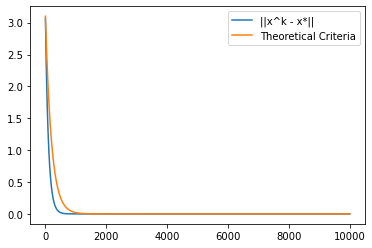

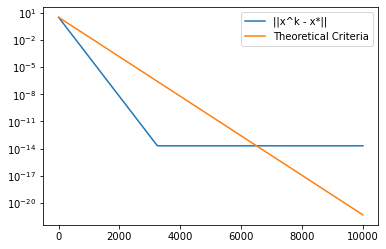

No handles with labels found to put in legend.


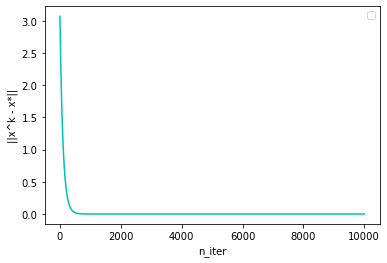

No handles with labels found to put in legend.


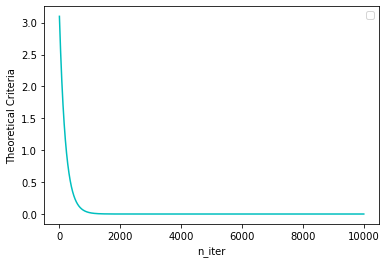

No handles with labels found to put in legend.


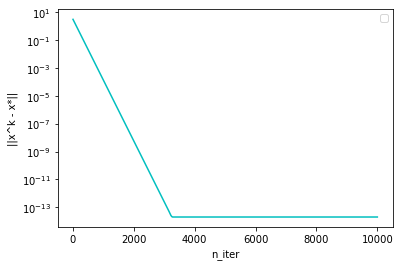

No handles with labels found to put in legend.


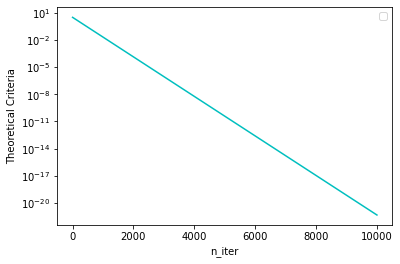

In [136]:
#ответ
#The dependence from seminar: k = L/mu * log(criteria^2/eps^2)
criteria_th = []
criteria_th.append(np.linalg.norm(x_0 - x_true))
for i in range(1, n_iter):
    criteria_th.append(criteria_th[-1] * np.sqrt(1 - mu/L))

X = [i + 1 for i in range(n_iter)]
Y1 = crit_arr
Y2 = criteria_th

plt.plot(X, Y1, label = '||x^k - x*||')
plt.plot(X, Y2, label = "Theoretical Criteria")
plt.legend()
plt.show()

plt.plot(X, Y1, label = '||x^k - x*||')
plt.plot(X, Y2, label = "Theoretical Criteria")
plt.yscale('log')
plt.legend()
plt.show()

plot_graph(X, Y1, '||x^k - x*||', '', False)
plot_graph(X, Y2, "Theoretical Criteria", '', False)
plot_graph(X, Y1, '||x^k - x*||', '', True)
plot_graph(X, Y2, "Theoretical Criteria", '', True)

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

No handles with labels found to put in legend.


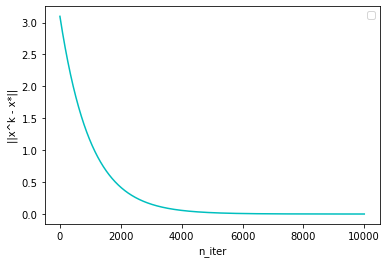

No handles with labels found to put in legend.


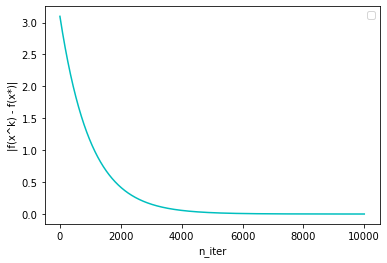

No handles with labels found to put in legend.


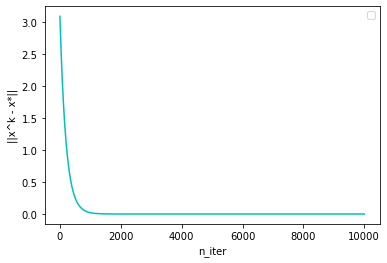

No handles with labels found to put in legend.


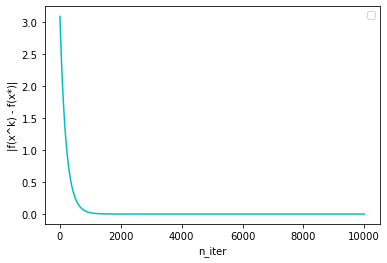

No handles with labels found to put in legend.


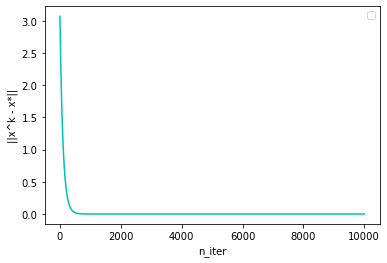

No handles with labels found to put in legend.


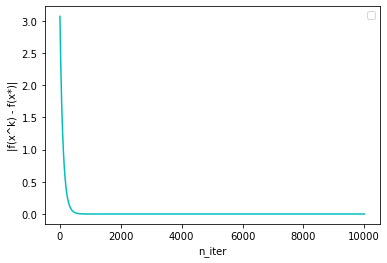

No handles with labels found to put in legend.


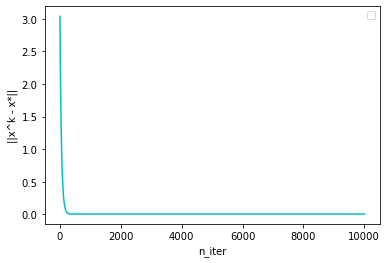

No handles with labels found to put in legend.


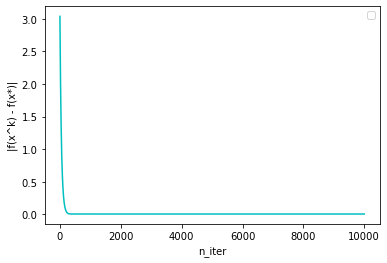

<ipython-input-130-05f04722a460>:13: RuntimeWarning: overflow encountered in matmul
  return 1/2*np.matmul((A + A.T), x) - b
<ipython-input-130-05f04722a460>:7: RuntimeWarning: invalid value encountered in subtract
  x_new = x_old - lr*grad
<ipython-input-129-90b3d45fc32f>:3: RuntimeWarning: overflow encountered in matmul
  return 1/2*(x.T @ A @ x - b.T @ x)
<ipython-input-129-90b3d45fc32f>:3: RuntimeWarning: invalid value encountered in matmul
  return 1/2*(x.T @ A @ x - b.T @ x)
No handles with labels found to put in legend.


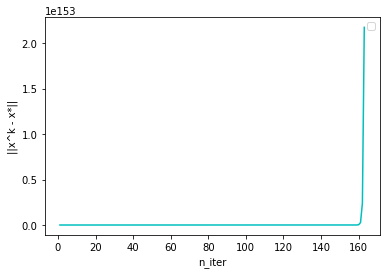

No handles with labels found to put in legend.


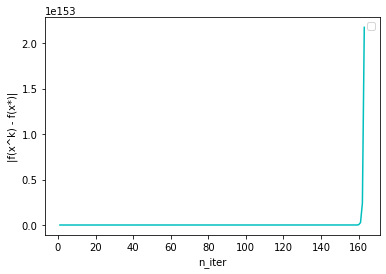

In [137]:
#ответ
for gamma in [0.001, 0.005, 0.01, 0.02, 0.1]: #2/L = 0.02
    points = Grad_Descent(n_iter, A, gamma, b, x_0)
    diff_arr = []
    crit_arr = []
    crit_2_arr = []
    for i in range(n_iter):
        diff_arr.append(points[i] - x_true)
        crit_arr.append(np.linalg.norm(diff_arr[i]))
        crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true)))

    plot_graph(X, crit_arr, '||x^k - x*||', '', False)
    plot_graph(X, crit_arr, '|f(x^k) - f(x*)|', '', False)

As we see after $γ ≥ \frac1L$ there is no convergence



__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

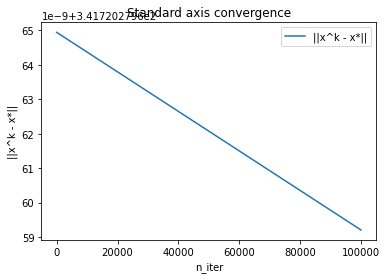

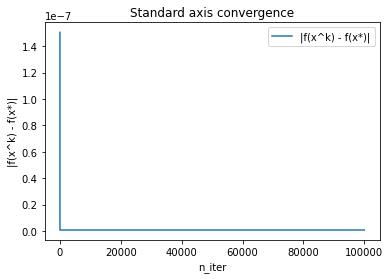

In [138]:
#ответ
d = 10  
mu = 0 
mu_approx = 0.0045
L = 1000
n_iter = 10**5
x_0 = np.random.sample(d)
b = np.random.sample(d)

A_approx = gen_A(d, mu_approx, L)               #generating the approximate matrix
lambda_min = min(np.linalg.eigvalsh(A_approx))  #minimal eigenvalue
x_true_approx = np.linalg.solve(A_approx, b)    #finding approximate solution
A = A_approx - lambda_min*np.eye(d)             #generating A
b = A @ x_true_approx                           #generating b

points = Grad_Descent(n_iter, A, 1/L, b, x_0)
diff_arr = []
crit_arr = []
crit_2_arr = []
for i in range(n_iter):
    diff_arr.append(points[i] - x_true_approx)
    crit_arr.append(np.linalg.norm(diff_arr[i]))
    crit_2_arr.append(np.abs(f(A, b, points[i]) - f(A, b, x_true_approx))) 

x = [i + 1 for i in range(n_iter)]
y1 = crit_arr
plt.plot(x, y1, label = '||x^k - x*||')
plt.xlabel('n_iter')
plt.ylabel('||x^k - x*||')
plt.title('Standard axis convergence')
plt.legend()
plt.show()


y2 = crit_2_arr
plt.plot(x, y2, label = '|f(x^k) - f(x*)|')
plt.xlabel('n_iter')
plt.ylabel('|f(x^k) - f(x*)|')
plt.title('Standard axis convergence')
plt.legend()
plt.show()


__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

No, not everything was great due to singularity of a matrix when $μ = 0$, so I needed to make an approximation of a matrix, therefore there is no convergence in criteria $\|x_k - x^* \|$, but the second criteria shows convergence (in a very strange way)

In [139]:
#ответ
#Added the criteria |f(x_k) - f(x*)| (mostly orange) to the previous parts with the code not to copy-paste

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [140]:
import my_optimization as opt
import numpy as np
import importlib

In [141]:
#Optimization problem
args = {}
args['L'], args['mu'], args['d'] = 1000, 1, 100
args['A'] = opt.gen_A(args['d'], args['mu'], args['L'])
x_0 = np.random.random_sample(args['d'])

args['n'] = 1 #not to have mistake with sara

def f(x, args):
    return 1/2 * x.T @ args['A'] @ x

def grad_f(x, args):
    return args['A'] @ x

In [142]:
times_list, iterations_list, differences_list, labels_list = [], [], [], []

  7%|▋         | 3473/50000 [00:00<00:01, 34479.31it/s]

The upper limit was broken!
The upper limit was broken!
The upper limit was broken!
The upper limit was broken!


100%|██████████| 50000/50000 [00:01<00:00, 42049.70it/s]


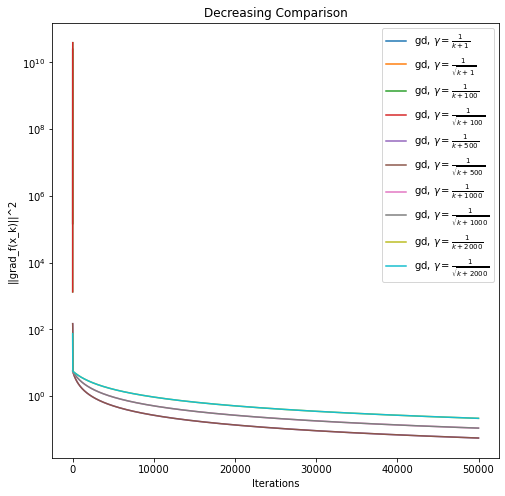

In [143]:
#Decreasing LR, parameters optimizing
x, y, labels = [], [], []
n_iter = 50000
def gamma_decreasing(k, f, grad_f, x_k, x_true, args):
        return 1 / (k + args['c'])

def gamma_decreasing_sqrt(k, f, grad_f, x_k, x_true, args):
        return 1 / np.sqrt(k + args['c'])

for args['c'] in [1, 100, 500, 1000, 2000]:
    gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_decreasing)
    points_arr, differences_arr, times_arr, acc_arr = gd.descent()
    iterations = [i for i in range(len(differences_arr))]

    x.append(iterations)
    y.append(differences_arr)
    labels.append(r'gd, $\gamma = \frac{1}{k + %i}$' % args['c'])

    gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_decreasing)
    points_arr, differences_arr, times_arr, acc_arr = gd.descent()
    iterations = [i for i in range(len(differences_arr))]

    x.append(iterations)
    y.append(differences_arr)
    labels.append(r'gd, $\gamma = \frac{1}{\sqrt{k + %i}}$' % args['c'])

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Decreasing Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

In [144]:
#Decreasing LR, best parameters
n_iter = 50000
args['c'] = 500

def gamma_decreasing_best(k, f, grad_f, x_k, x_true, args):
        return 1 / np.sqrt(k + args['c'])
gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_decreasing)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma = \frac{1}{\sqrt{k + 500}}$')

100%|██████████| 50000/50000 [00:01<00:00, 41659.95it/s]


  0%|          | 78/50000 [00:00<00:30, 1629.35it/s]


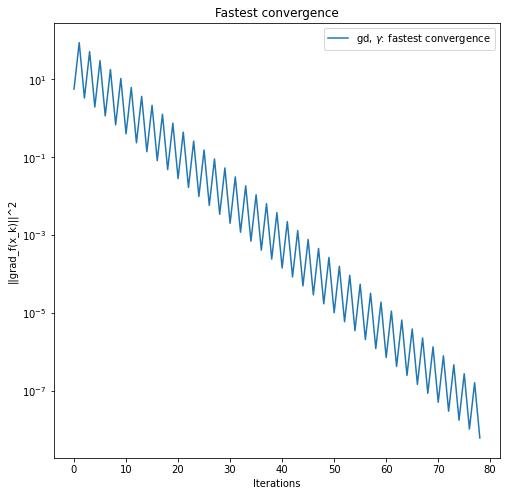

In [145]:
#Fastest Descent
import scipy.optimize as spo

x, y, labels = [], [], []
n_iter = 50000

def gamma_fastest(k, f, grad_f, x_k, x_true, args):
    def g(gamma):
        return f(x_k - gamma * grad_f(x_k, args), args)
    
    res = spo.minimize_scalar(g)
    return res.x

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_fastest)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

x.append(iterations)
y.append(differences_arr)
labels.append(r'gd, $\gamma$: fastest convergence')

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Fastest convergence', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma$: fastest convergence')

 40%|████      | 20142/50000 [00:01<00:01, 17991.70it/s]


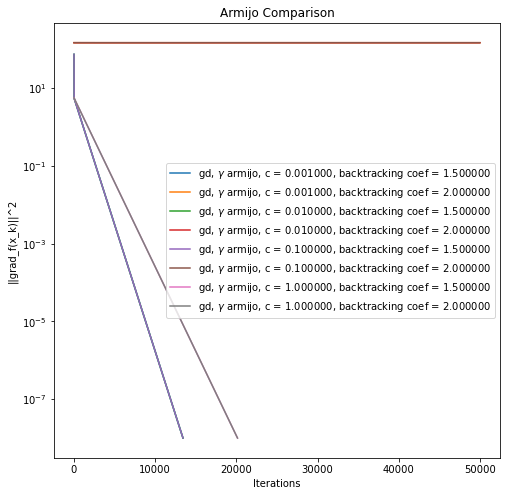

In [146]:
#Armijo, parameters optimizing
x, y, labels = [], [], []
n_iter = 50000
args['alpha'] = 1 / args['L']

def gamma_armijo(k, f, grad_f, x_k, x_true, args):
        if f(x_k - args['alpha'] * grad_f(x_k, args), args) <= f(x_k, args) - \
        args['c1'] * args['alpha'] * np.linalg.norm(grad_f(x_k, args), ord=2)**2:
            return args['alpha'] * args['backtracking_coef']
        else:
            return args['alpha']

for args['c1'] in [0.001, 0.01, 0.1, 1]:
    for args['backtracking_coef'] in [1.5, 2]:
        gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, 
                                n_iter = n_iter, gamma_k = gamma_armijo)
        
        points_arr, differences_arr, times_arr, acc_arr = gd.descent()
        iterations = [i for i in range(len(differences_arr))]

        x.append(iterations)
        y.append(differences_arr)
        labels.append(r'gd, $\gamma$ armijo, c = %f, backtracking coef = %f' % (args['c1'], args['backtracking_coef']))

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Armijo Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

In [147]:
#Armijo, best parameters
n_iter = 50000
args['c1'] = 0.1
args['backtracking_coef'] = 1.5
args['alpha'] = 1 / args['L']

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_armijo)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma$ armijo, c = %f, backtracking coef = %f' % (args['c'], args['backtracking_coef']))

 27%|██▋       | 13425/50000 [00:00<00:02, 16924.40it/s]


 40%|████      | 20142/50000 [00:01<00:01, 15907.65it/s]


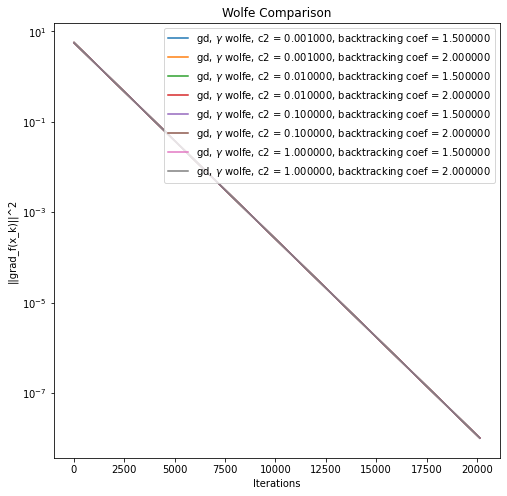

In [148]:
#Wolfe, parameters optimizing
x, y, labels = [], [], []
n_iter = 50000
args['alpha'] = 1 / args['L']
args['c1'] = 0.1

def gamma_wolfe(k, f, grad_f, x_k, x_true, args): #sufficient decrease + sufficient curvature condition
        if f(x_k - args['alpha'] * grad_f(x_k, args), args) <= f(x_k, args) - \
        args['c'] * args['alpha'] * np.linalg.norm(grad_f(x_k, args), ord=2)**2 and - \
        grad_f(x_k - args['alpha'] * grad_f(x_k, args), args).T @ grad_f(x_k, args) >= - \
        args['c2']  * np.linalg.norm(grad_f(x_k, args), ord=2)**2:
            return args['alpha'] * args['backtracking_coef']
        else:
            return args['alpha']

for args['c2'] in [0.001, 0.01, 0.1, 1]:
    for args['backtracking_coef'] in [1.5, 2]:
        gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, 
                                n_iter = n_iter, gamma_k = gamma_wolfe)
        
        points_arr, differences_arr, times_arr, acc_arr = gd.descent()
        iterations = [i for i in range(len(differences_arr))]

        x.append(iterations)
        y.append(differences_arr)
        labels.append(r'gd, $\gamma$ wolfe, c2 = %f, backtracking coef = %f' % (args['c2'], args['backtracking_coef']))

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Wolfe Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

In [149]:
#Wolfe, best parameters
n_iter = 50000
args['c1'] = 0.1
args['c2'] = 0.1
args['backtracking_coef'] = 1.5
args['alpha'] = 1 / args['L']

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_wolfe)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma$ armijo, c = %f, backtracking coef = %f' % (args['c'], args['backtracking_coef']))

 40%|████      | 20142/50000 [00:01<00:01, 16869.48it/s]


100%|██████████| 50000/50000 [00:03<00:00, 12857.38it/s]


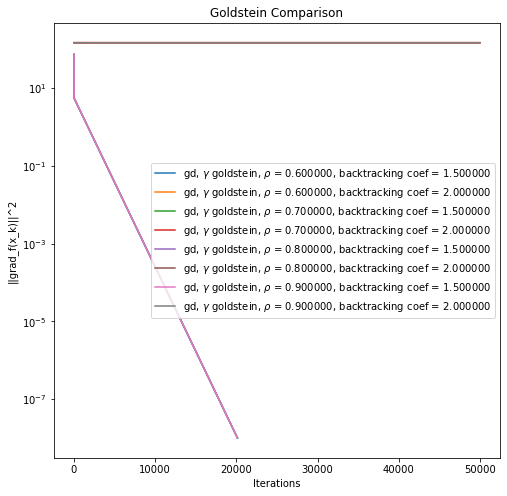

In [150]:
#Goldstein, parameters optimizing
x, y, labels = [], [], []
n_iter = 50000
args['alpha'] = 1 / args['L']

def gamma_goldstein(k, f, grad_f, x_k, x_true, args): 
        if f(x_k, args) - args['rho'] * args['alpha'] * np.linalg.norm(grad_f(x_k, args), ord=2)**2 <= + \
        f(x_k - args['alpha'] * grad_f(x_k, args), args) <= + \
        f(x_k, args) - (1 - args['rho']) * args['alpha'] * np.linalg.norm(grad_f(x_k, args), ord=2)**2:
            return args['alpha'] * args['backtracking_coef']
        else:
            return args['alpha']

for args['rho'] in [0.6, 0.7, 0.8, 0.9]:
    for args['backtracking_coef'] in [1.5, 2]:
        gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, 
                                n_iter = n_iter, gamma_k = gamma_goldstein)
        
        points_arr, differences_arr, times_arr, acc_arr = gd.descent()
        iterations = [i for i in range(len(differences_arr))]

        x.append(iterations)
        y.append(differences_arr)
        labels.append(r'gd, $\gamma$ goldstein, $\rho$ = %f, backtracking coef = %f' % (args['rho'], args['backtracking_coef']))

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Goldstein Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

In [151]:
#Goldstein, best parameters
n_iter = 50000
args['backtracking_coef'] = 1.5
args['alpha'] = 1 / args['L']
args['rho'] = 0.9

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_goldstein)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma$ goldstein, $\rho$ = %f, backtracking coef = %f' % (args['rho'], args['backtracking_coef']))

 40%|████      | 20139/50000 [00:01<00:01, 16730.01it/s]


$\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

 82%|████████▏ | 40823/50000 [00:01<00:00, 20710.64it/s]


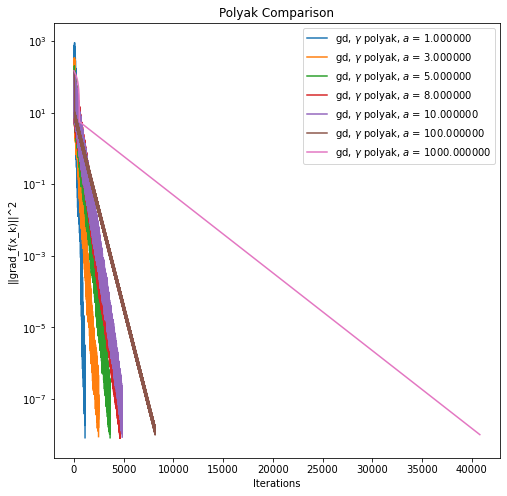

In [152]:
#Polyak, parameters optimizing
x, y, labels = [], [], []
n_iter = 50000

def gamma_polyak(k, f, grad_f, x_k, x_true, args): 
    return f(x_k, args) / (args['a'] * np.linalg.norm(grad_f(x_k, args), ord=2)**2)
        
for args['a'] in [1, 3, 5, 8, 10, 100, 1000]:
    gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, 
                            n_iter = n_iter, gamma_k = gamma_polyak)
    
    points_arr, differences_arr, times_arr, acc_arr = gd.descent()
    iterations = [i for i in range(len(differences_arr))]

    x.append(iterations)
    y.append(differences_arr)
    labels.append(r'gd, $\gamma$ polyak, $a$ = %f' % (args['a']))

opt.plot_graphs(x, y, x_label = "Iterations", 
                lines_labels = labels, title = 'Polyak Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

In [153]:
#Polyak, best parameters
n_iter = 50000
args['a'] = 1

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = gamma_polyak)
points_arr, differences_arr, times_arr, acc_arr = gd.descent()
iterations = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma$ polyak, $a$ = %f' % (args['a']))

  2%|▏         | 1109/50000 [00:00<00:03, 14441.61it/s]


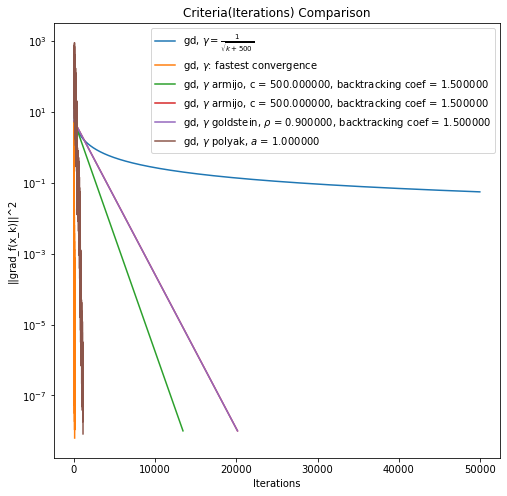

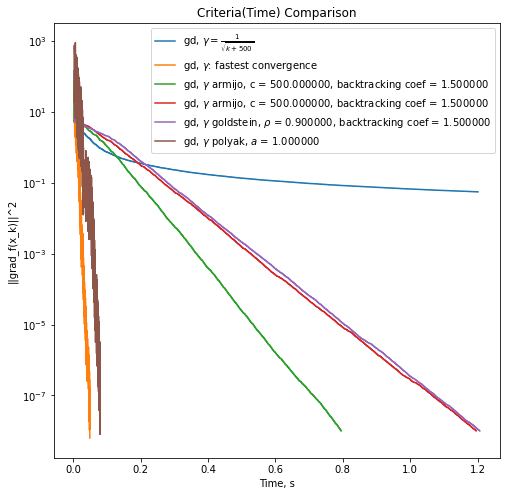

In [154]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "||grad_f(x_k)||^2")

### Conclusion

As we can see in this case the best learning rate tuning is Fastest Convergence, not that far away from it comes Polyak's method. Other methods of step tuning perform worse